<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Graphics" data-toc-modified-id="Graphics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graphics</a></span></li></ul></li><li><span><a href="#Getting-Ready" data-toc-modified-id="Getting-Ready-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Ready</a></span><ul class="toc-item"><li><span><a href="#Base-Integrator-Settings" data-toc-modified-id="Base-Integrator-Settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base Integrator Settings</a></span></li><li><span><a href="#Initial-Conditions" data-toc-modified-id="Initial-Conditions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initial Conditions</a></span></li></ul></li><li><span><a href="#Batch-Execution" data-toc-modified-id="Batch-Execution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Batch Execution</a></span></li><li><span><a href="#Batch-Processing." data-toc-modified-id="Batch-Processing.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Batch Processing.</a></span></li></ul></div>

# Initialization

In [10]:
###### Do not touch
MinVersion = 23

import PyUltraLight2 as PyUL

if (PyUL.S_version < MinVersion):
    raise RuntimeError("You need the latest PyULN!")

import numpy as np

np.set_printoptions(suppress=True)

import math

import numba
import numexpr as ne
import time
import pyfftw
import os
import sys
import multiprocessing
import numpy

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.animation
from matplotlib.offsetbox import AnchoredText

import IPython
from IPython.core.display import clear_output, display, Video

from numpy import sqrt, exp, log, log10, sin, cos, tan, pi

%reload_ext autoreload
%autoreload 2


# Useful Aux Functions
ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

printU = PyUL.printU


m22 = PyUL.axion_E / 1e-22

printU(f"m22 = {m22:.3g}", 'universe')

PyUL2.universe: m22 = 10


## Graphics

In [11]:
plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["text.usetex"]= False
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'w'

from matplotlib.colors import LinearSegmentedColormap
Palette = 'magma'
cyccol=['#000000', '#ffffff','#000000']
divcol=['#003262','#005b96','#ffffff','#d5a756','#B51700']
divcols=['#005b96','#ffffff','#d5a756']

CycPalette = LinearSegmentedColormap.from_list('myCyc', cyccol)

DivPalette  = LinearSegmentedColormap.from_list('myDiv', divcol)
DivPaletteS  = LinearSegmentedColormap.from_list('myDiv', divcols)

EFigSize = (20,12)
EFigSizeMono = (20,6)
VideoSize = (8,8)
FPS = 10
DPI = 72

FrameCap = 60 # Maximum Number of Frames to Animate

########################################

# BH Trajectory

Colors = np.array([[209,17,65],[0,177,89],[0,174,219],[243,119,53],[255,196,37]])/255

# NBody
ENStyle = '-'
ENColor = '#ff6c0e' # NBody

EKColor = '#8dd9e7'
EPColor = '#fd8dc8'

# ULDM
EUStyle = '-'
EUColor = '#7f1717' # ULDM

EQColor = '#ccb603' # Kinetic 
ERColor = '#6cc25c' # Self-Interaction
EGColor = '#2c8899' # Particle Potential

# Totals
ETStyle = '-'
ETColor = '#080808'

# Auxiliary 
HelperStyle = 'k.'
EmphColor = 'black'
GeomColor = 'olivedrab'

# Getting Ready

## Base Integrator Settings

In [12]:
resol = 192

length, length_units = 4.5, 'kpc' #
duration, duration_units = 1, 'Gyr' #

start_time = 0. # For solitons only: Pre-evolve the wavefunction phase.

NS = 32

save_format = 'npy' # npy, npz, hdf5

step_factor = 1 # Keep it on default

save_number = 200

PyUL.DispN(duration,duration_units,length,length_units,resol,step_factor,save_number)

# You can also set it to 'Minimum' to only save all 1D mesh Data.
Save_Options = '2Density Energy NBody DF'

#This Boolean List is for program's internal use
save_options = PyUL.SaveOptionsDigest(Save_Options)

s_mass_unit = 'M_solar_masses'
s_position_unit = 'kpc'
s_velocity_unit = 'km/s' 
m_mass_unit = s_mass_unit
m_position_unit = s_position_unit
m_velocity_unit = s_velocity_unit


Uniform = False # if True, then there won't be solitons.
Density = 0
UVel = [0,0,0] # Uses s_velocity_units
density_unit = '' # Accepted units: 'MSol/pc3', 'kg/m3', and '' for dimensionless units

The required number of ULDM steps is 11204
The actual ULDM steps is 11400


0.017569968131081883

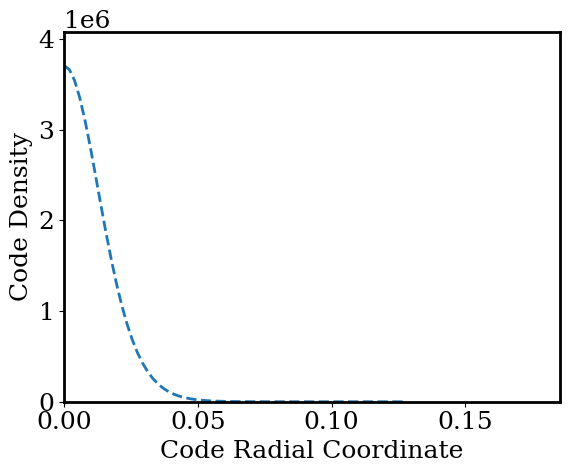

In [13]:
mS = 12 # User Input

Phase = 0 # Multiples of pi

PyUL.SolitonSizeEstimate(mS,length,resol,s_mass_unit,length_units, Plot = True)

## Initial Conditions

In [20]:
save_path = 'Batches/MR_Pro'

PyUL.DSManagement(save_path, Force = True)

PyUL2.Universe: Axion Mass: 1e-21 eV.
PyUL2.Universe: Axion Mass: 1e-21 eV.
[ Batches/MR_Pro ] : The current size of the folder is 1387.497 Mib
Folder Cleaned! 

[ Batches/MR_Pro ] : Save Folder Created.


In [21]:
RatioList = [0.005, 0.01, 0.02, 0.04, 0.08]
RadiusList = [0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3,0.4,0.45]

N = len(RatioList) * len(RadiusList)

I = 0

Laps = 10

for i in range(len(RadiusList)):
    
    r0 = RadiusList[i]
    
    for j in range(len(RatioList)):
        
        I+=1
        
        Ratio = RatioList[j]

        gridspace = PyUL.MeshSpacing(resol,length,length_units, silent = True)
        
        rP = 1/2 * gridspace

        a = PyUL.GenPlummer(rP,length_units)

        mP = mS * Ratio# User Input

        MIn, vRel0 = PyUL.DefaultSolitonOrbit(resol,length, length_units, mS, s_mass_unit, r0,
                                              m_position_unit, m_velocity_unit, Detail = int(7e4))

        
        duration = Laps * PyUL.convert_back(2*np.pi*PyUL.convert(r0,length_units,'l') / PyUL.convert(vRel0,m_velocity_unit,'v'),duration_units,'t')
        
        print(f'{MIn/mS:.2%}@ r = {r0}\n==')
        print(f'T = {duration:.5f} {duration_units}')
        #================================================================
        # Do not touch
        embeds    = []
        particles =  [[mP,[r0,0,0],[0,vRel0,0]]]
        solitons  =  [[mS,[0,0,0],[0,0,0],0]]

        plt.show()

        Name = f'M{Ratio}_R{r0}'

        Initpath = ''

        run_folder = PyUL.GenerateConfig(NS, length, length_units,
                                         resol, duration, duration_units, step_factor,
                                         save_number, Save_Options, save_path,
                                         save_format, s_mass_unit, s_position_unit,
                                         s_velocity_unit, solitons,start_time,
                                         m_mass_unit, m_position_unit, m_velocity_unit,
                                         particles,embeds, Uniform,Density,density_unit,
                                         a,UVel,True,Name)
        
        
print('Done!', f'Initialized {I} simulations.')

2.42%@ r = 0.08
==
T = 1.24549 Gyr
2.42%@ r = 0.08
==
T = 1.24549 Gyr
2.42%@ r = 0.08
==
T = 1.24549 Gyr
2.42%@ r = 0.08
==
T = 1.24549 Gyr
2.42%@ r = 0.08
==
T = 1.24549 Gyr
4.53%@ r = 0.1
==
T = 1.27125 Gyr
4.53%@ r = 0.1
==
T = 1.27125 Gyr
4.53%@ r = 0.1
==
T = 1.27125 Gyr
4.53%@ r = 0.1
==
T = 1.27125 Gyr
4.53%@ r = 0.1
==
T = 1.27125 Gyr
7.45%@ r = 0.12
==
T = 1.30370 Gyr
7.45%@ r = 0.12
==
T = 1.30370 Gyr
7.45%@ r = 0.12
==
T = 1.30370 Gyr
7.45%@ r = 0.12
==
T = 1.30370 Gyr
7.45%@ r = 0.12
==
T = 1.30370 Gyr
11.16%@ r = 0.14
==
T = 1.34223 Gyr
11.16%@ r = 0.14
==
T = 1.34223 Gyr
11.16%@ r = 0.14
==
T = 1.34223 Gyr
11.16%@ r = 0.14
==
T = 1.34223 Gyr
11.16%@ r = 0.14
==
T = 1.34223 Gyr
15.60%@ r = 0.16
==
T = 1.38697 Gyr
15.60%@ r = 0.16
==
T = 1.38697 Gyr
15.60%@ r = 0.16
==
T = 1.38697 Gyr
15.60%@ r = 0.16
==
T = 1.38697 Gyr
15.60%@ r = 0.16
==
T = 1.38697 Gyr
20.66%@ r = 0.18
==
T = 1.43803 Gyr
20.66%@ r = 0.18
==
T = 1.43803 Gyr
20.66%@ r = 0.18
==
T = 1.43803 Gyr
20.66%@ r = 

[**Back to the Top**](#root)
<a id='run'></a>
# Batch Execution

This creates a timestamped folder using the current settings, and the integrator stores all requested files in it too.

In [ ]:
FullSim = True
Shift = False
T0 = time.time()
runs = os.listdir(save_path)
runs.sort()

NRuns = len(runs)

Run = 0

for run_folder in runs:
    
    if os.path.isdir(f'{save_path}/{run_folder}'):
        
        RunText = f'Simulation #{Run+1} out of {NRuns}'
        PyUL.evolve(save_path,run_folder,
            NBodyInterp = FullSim, SelfGravity = FullSim, NBodyGravity = True, 
            Silent = True, Shift = Shift, AutoStop = False, AutoStop2 = False, Message = RunText,
                   Stream = False, StreamChar = [1,4])

        Run +=1

        print(f'Simulation {Run} finished.')
        time.sleep(2)
        
import IPython
IPython.display.Audio("Done.mp3",autoplay=True)

print(f"{time.time()-T0:.3g}s")
printU('Please copy this into analysis notebook\n\nbatch_path = \''+batch_path+'\'','Export')

# Batch Processing.

In [5]:
### Initializing Journaling Variables

#### Dummies and Aux
TimeLog = [] # Time Series
ResoLog = [] # Resolutions
PlRaLog = [] # Plummer Radii

#### Core Variables
IniRLog = [] # Initial Radius Handle
MaRaLog = [] # Mass Ratio Handle

TMMaLog = [] # NBody Mass
TMDSLog = [] # NBody Traj
TMDNLog = [] # NBody Kinetic Energies
DyTSLog = [] # Dynamical Timescale
IniDLog = [] # Initial Density


RatioList = [0.005, 0.01, 0.02, 0.04, 0.08]
RadiusList = [0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3,0.4,0.8]

NRt = len(RatioList)
NRd = len(RadiusList)

In [6]:
save_path = './Batches/' + PyUL.Runs('./Batches', Automatic = False)

runs = os.listdir(save_path)
runs.sort()

Run = 0
for run_folder in runs:
    loc = './' + save_path + '/' + run_folder
    if os.path.isdir(loc):

        clear_output()
        
        # Reload Config.. Why don't I use a class?
        NS, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_format, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform,Density, density_unit ,a, UVel = PyUL.LoadConfig(loc)

        if save_number == -1:
            sim_number = PyUL.ULDStepEst(duration,duration_units,
                                                  length,length_units,
                                                  resol,step_factor, 
                                                  save_number = -1)
        else:
            sim_number = save_number

        # Dict of Run Data
        EndNum, Loaded = PyUL.Load_npys(loc,save_options)

        TMdata = Loaded['NBody']
        
        Loaded = {}

        NBo = len(particles)


        print(f'SIM NUMBER IS {sim_number}')
        # Time
        durationMyr = CB(duration,duration_units,'Myr','t')

        # Space
        lengthKpc = CB(length,length_units,'kpc','l')
        lengthC = ToCode(length,length_units,'l')

        # Mass

        MassList_MSol = []
        MassListSI = []
        for TM in particles:
            MassList_MSol.append(CB(TM[0],m_mass_unit,'M_solar_masses','m'))
            MassListSI.append(CB(TM[0],m_mass_unit,'kg','m'))

        # Density
        DensitySI = CB(Density,density_unit,'kg/m3','d')
        DensityC = ToCode(Density,density_unit,'d')

        ## Misc. Pre-Multipliers


        # NBody_State Vector

        XPre = ToPhys(1,'kpc','l')
        VPre = ToPhys(1,'km/s','v')

        XPreSI = ToPhys(1,'m','l')
        VPreSI = ToPhys(1,'m/s','v')

        IArray = np.arange(len(TMdata[0]))

        # Dimensionful NBody State

        TMDataS = np.array(TMdata)
        TMDataSI = np.array(TMdata)

        TMDataS[:,IArray % 6 <= 2] *= XPre
        TMDataS[:,IArray % 6 >= 3] *= VPre


        TMDataSI[:,IArray % 6 <= 2] *= XPreSI
        TMDataSI[:,IArray % 6 >= 3] *= VPreSI


        # Rho data
        DPre = CB(1,density_unit,'kg/m3','d')
        # Energy
        EPre = PyUL.energy_unit
        # Field Strength
        PPre = PyUL.mass_unit / PyUL.length_unit

        # Translating Snapshots back to Time
        
        timerange = np.linspace(0,durationMyr,save_number+1)

        Tp = np.arange(EndNum)

        Tp = Tp * durationMyr / (sim_number+1)

        TpSec = PyUL.convert_between(Tp,'Myr','s','t')
        # Reconstruct NBody Energy (Real)
        NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum, a, length_units)
        rP = PyUL.RecPlummer(a,length_units)
        

        # Important Information Recreation
        
        mP = PyUL.convert(particles[0][0],m_mass_unit,'m')
        
        mS = PyUL.convert(solitons[0][0],s_mass_unit,'m')
        
        xP = np.array(particles[0][1])
        sP = np.array(solitons[0][1])
        
        xPC = PyUL.convert(xP,m_position_unit,'l')
        sPC = PyUL.convert(sP,s_position_unit,'l')
        
        rC = np.linalg.norm(xPC-sPC)
        
        MIn, vRel0 = PyUL.DefaultSolitonOrbit(resol,length, 
                                              length_units, mS, '', rC, '', m_velocity_unit)
        
        MInSI = PyUL.convert_between(MIn,s_mass_unit,'kg','m')
        vRel0SI = PyUL.convert_between(vRel0,m_velocity_unit,'m/s','v')
        MBHSI = PyUL.convert_between(mP,m_mass_unit,'kg','m')
        RSI = PyUL.convert_between(rC,'','m','l')
        
        Density0 = PyUL.ReadLocalDensity(loc)
        DensitySI = PyUL.convert_between(Density0,'','kg/m3','d')
        
        print(MInSI, vRel0SI, MBHSI, RSI, DensitySI)
        
        T = PyUL.convert_between((MInSI)**(3/2) / (4*pi*np.sqrt(PyUL.G)*MBHSI*DensitySI*RSI**(3/2)),'s','','t')

        print(T, 'Myr')
        
        
        
        TimeLog.append(Tp)
        ResoLog.append(resol)
        PlRaLog.append(rP)
        
        TMMaLog.append(mP)
        TMDSLog.append(TMDataS[:,0:3])
        TMDNLog.append(KS)
        
        DyTSLog.append(T)
        IniDLog.append(DensitySI)
        
        
        IniRLog.append(RadiusList[Run % NRd])
        MaRaLog.append(RatioList[Run // NRd])
        
        Run += 1
        
        clear_output()
        
printU('Processing Complete!','IO')

PyUL2.   IO: Processing Complete!


In [8]:
len(DyTSLog)

55

In [7]:
import scipy.interpolate as SInt

def InterpolateCurve(x,y, Resol = 1500):
    
    t = np.arange(len(x))

    BSplineX = SInt.make_interp_spline(t,x)
    BSplineY = SInt.make_interp_spline(t,y)
    
    
    T = np.linspace(t[0],t[-1],Resol)
    
    Fitx = BSplineX(T)
    Fity = BSplineY(T)
    
    return Fitx, Fity

Text(0.5, 1.0, 'Initial Radius = 0.2 kpc')

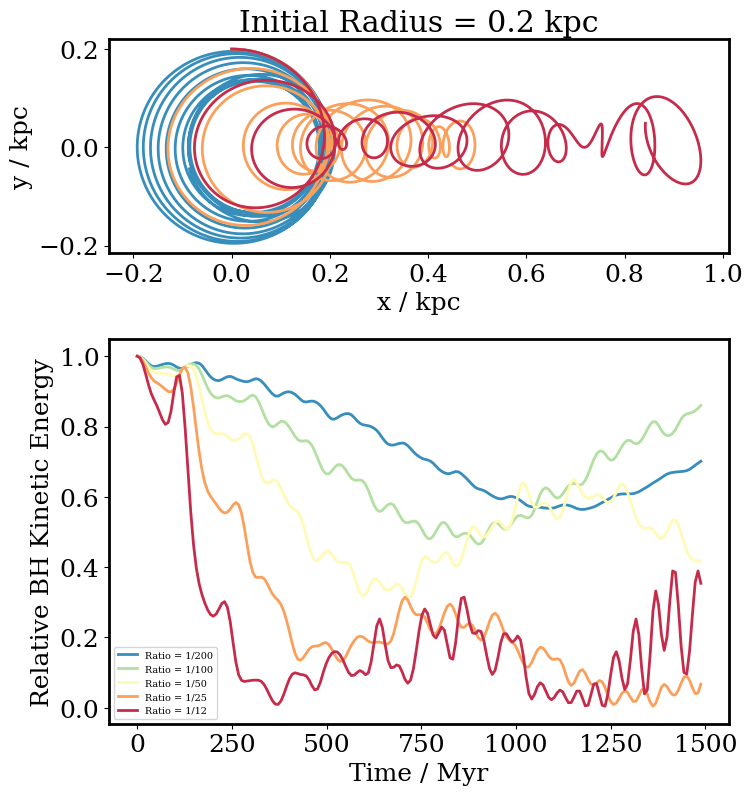

In [9]:
fig = plt.figure(figsize = (8,10), dpi = 100)


BaseGrid = plt.GridSpec(2, 1, hspace=0)


ax = fig.add_subplot(BaseGrid[0,0])
axE = fig.add_subplot(BaseGrid[1,0])


ax.set_aspect('equal')


Color = plt.cm.Spectral_r(np.linspace(0,1,len(ResoLog)))


RadSlice = -5

def ConditionT(i):
    return (IniRLog[i] == RadiusList[RadSlice]) and ((MaRaLog[i]>0.02) or MaRaLog[i] == 0.005)

def ConditionE(i):
    return (IniRLog[i] == RadiusList[RadSlice])


for i in range(len(ResoLog)):
    
    Data = TMDSLog[i]
    
    if ConditionT(i):
    
        TraX, TraY = InterpolateCurve(Data[:,1],Data[:,0])
    
        ax.plot(TraX,TraY, lw = 2, color = Color[i])
    
    if ConditionE(i):
        axE.plot(TimeLog[i],TMDNLog[i]/TMDNLog[i][0], color = Color[i],label = f'Ratio = 1/{1/MaRaLog[i]:.0f}')
    
axE.legend(fontsize= 7)


lengthSI = PyUL.convert_between(lengthKpc,'kpc','m','l')

Zoom = 5

#ax.set_xlim(-lengthSI/2/Zoom,lengthSI/2/Zoom)
#ax.set_ylim(-lengthSI/2/Zoom,lengthSI/2/Zoom)

ax.set_xlabel('x / kpc')
ax.set_ylabel('y / kpc')

axE.set_xlabel('Time / Myr')
axE.set_ylabel('Relative BH Kinetic Energy')

ax.set_title(f'Initial Radius = {RadiusList[RadSlice]} kpc')
